<a href="https://colab.research.google.com/github/ghostypods/deaths-by-police-analysis/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"Shapes:\n"
      f"hh_imcome = {df_hh_income.shape}\n"
      f"pct_poverty = {df_pct_poverty.shape}\n"
      f"pct_completed_hs = {df_pct_completed_hs.shape}\n"
      f"share_race_city = {df_share_race_city.shape}\n"
      f"fatalities = {df_fatalities.shape}")

Shapes:
hh_imcome = (29322, 3)
pct_poverty = (29329, 3)
pct_completed_hs = (29329, 3)
share_race_city = (29268, 7)
fatalities = (2535, 14)


In [ ]:
print(f"column names:\n"
      f"hh_imcome = {df_hh_income.columns}\n"
      f"pct_poverty = {df_pct_poverty.columns}\n"
      f"pct_completed_hs = {df_pct_completed_hs.columns}\n"
      f"share_race_city = {df_share_race_city.columns}\n"
      f"fatalities = {df_fatalities.columns}")

column names:
hh_imcome = Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
pct_poverty = Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
pct_completed_hs = Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
share_race_city = Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
fatalities = Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
print(f"Are there any NaN?:\n"
      f"hh_imcome = {df_hh_income.isna().values.any()}\n"
      f"pct_poverty = {df_pct_poverty.isna().values.any()}\n"
      f"pct_completed_hs = {df_pct_completed_hs.isna().values.any()}\n"
      f"share_race_city = {df_share_race_city.isna().values.any()}\n"
      f"fatalities = {df_fatalities.isna().values.any()}")

Are there any NaN?:
hh_imcome = True
pct_poverty = False
pct_completed_hs = False
share_race_city = False
fatalities = True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.dropna(inplace=True)
df_pct_poverty.dropna(inplace=True)
df_pct_completed_hs.dropna(inplace=True)
df_share_race_city.dropna(inplace=True)
df_fatalities.dropna(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace('-', 0)
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

poverty_per_state = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_per_state_sorted = poverty_per_state.sort_values('poverty_rate', ascending=True)

In [ ]:
h_bar = px.bar(
    poverty_per_state_sorted,
    x='Geographic Area',
    y='poverty_rate',
    title="Poverty Rate per State"
)

h_bar.update_layout(xaxis_title="State",
                    yaxis_title='Poverty Rate',
                    coloraxis_showscale=True)

h_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', 0)
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

graduation_by_state = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})
graduation_by_state_sorted = graduation_by_state.sort_values('percent_completed_hs')

In [ ]:
h_bar = px.bar(
    graduation_by_state_sorted,
    x='Geographic Area',
    y='percent_completed_hs',
    title="Graduation Percentage per State"
)

h_bar.update_layout(xaxis_title="State",
                    yaxis_title='Graduation Percentage',
                    coloraxis_showscale=True,
                    yaxis=dict(range=[70, 95]))

h_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
hs_grads_poverty = pd.merge(poverty_per_state, graduation_by_state, on='Geographic Area')
hs_grads_poverty.sort_values('percent_completed_hs', ascending=False, inplace=True)

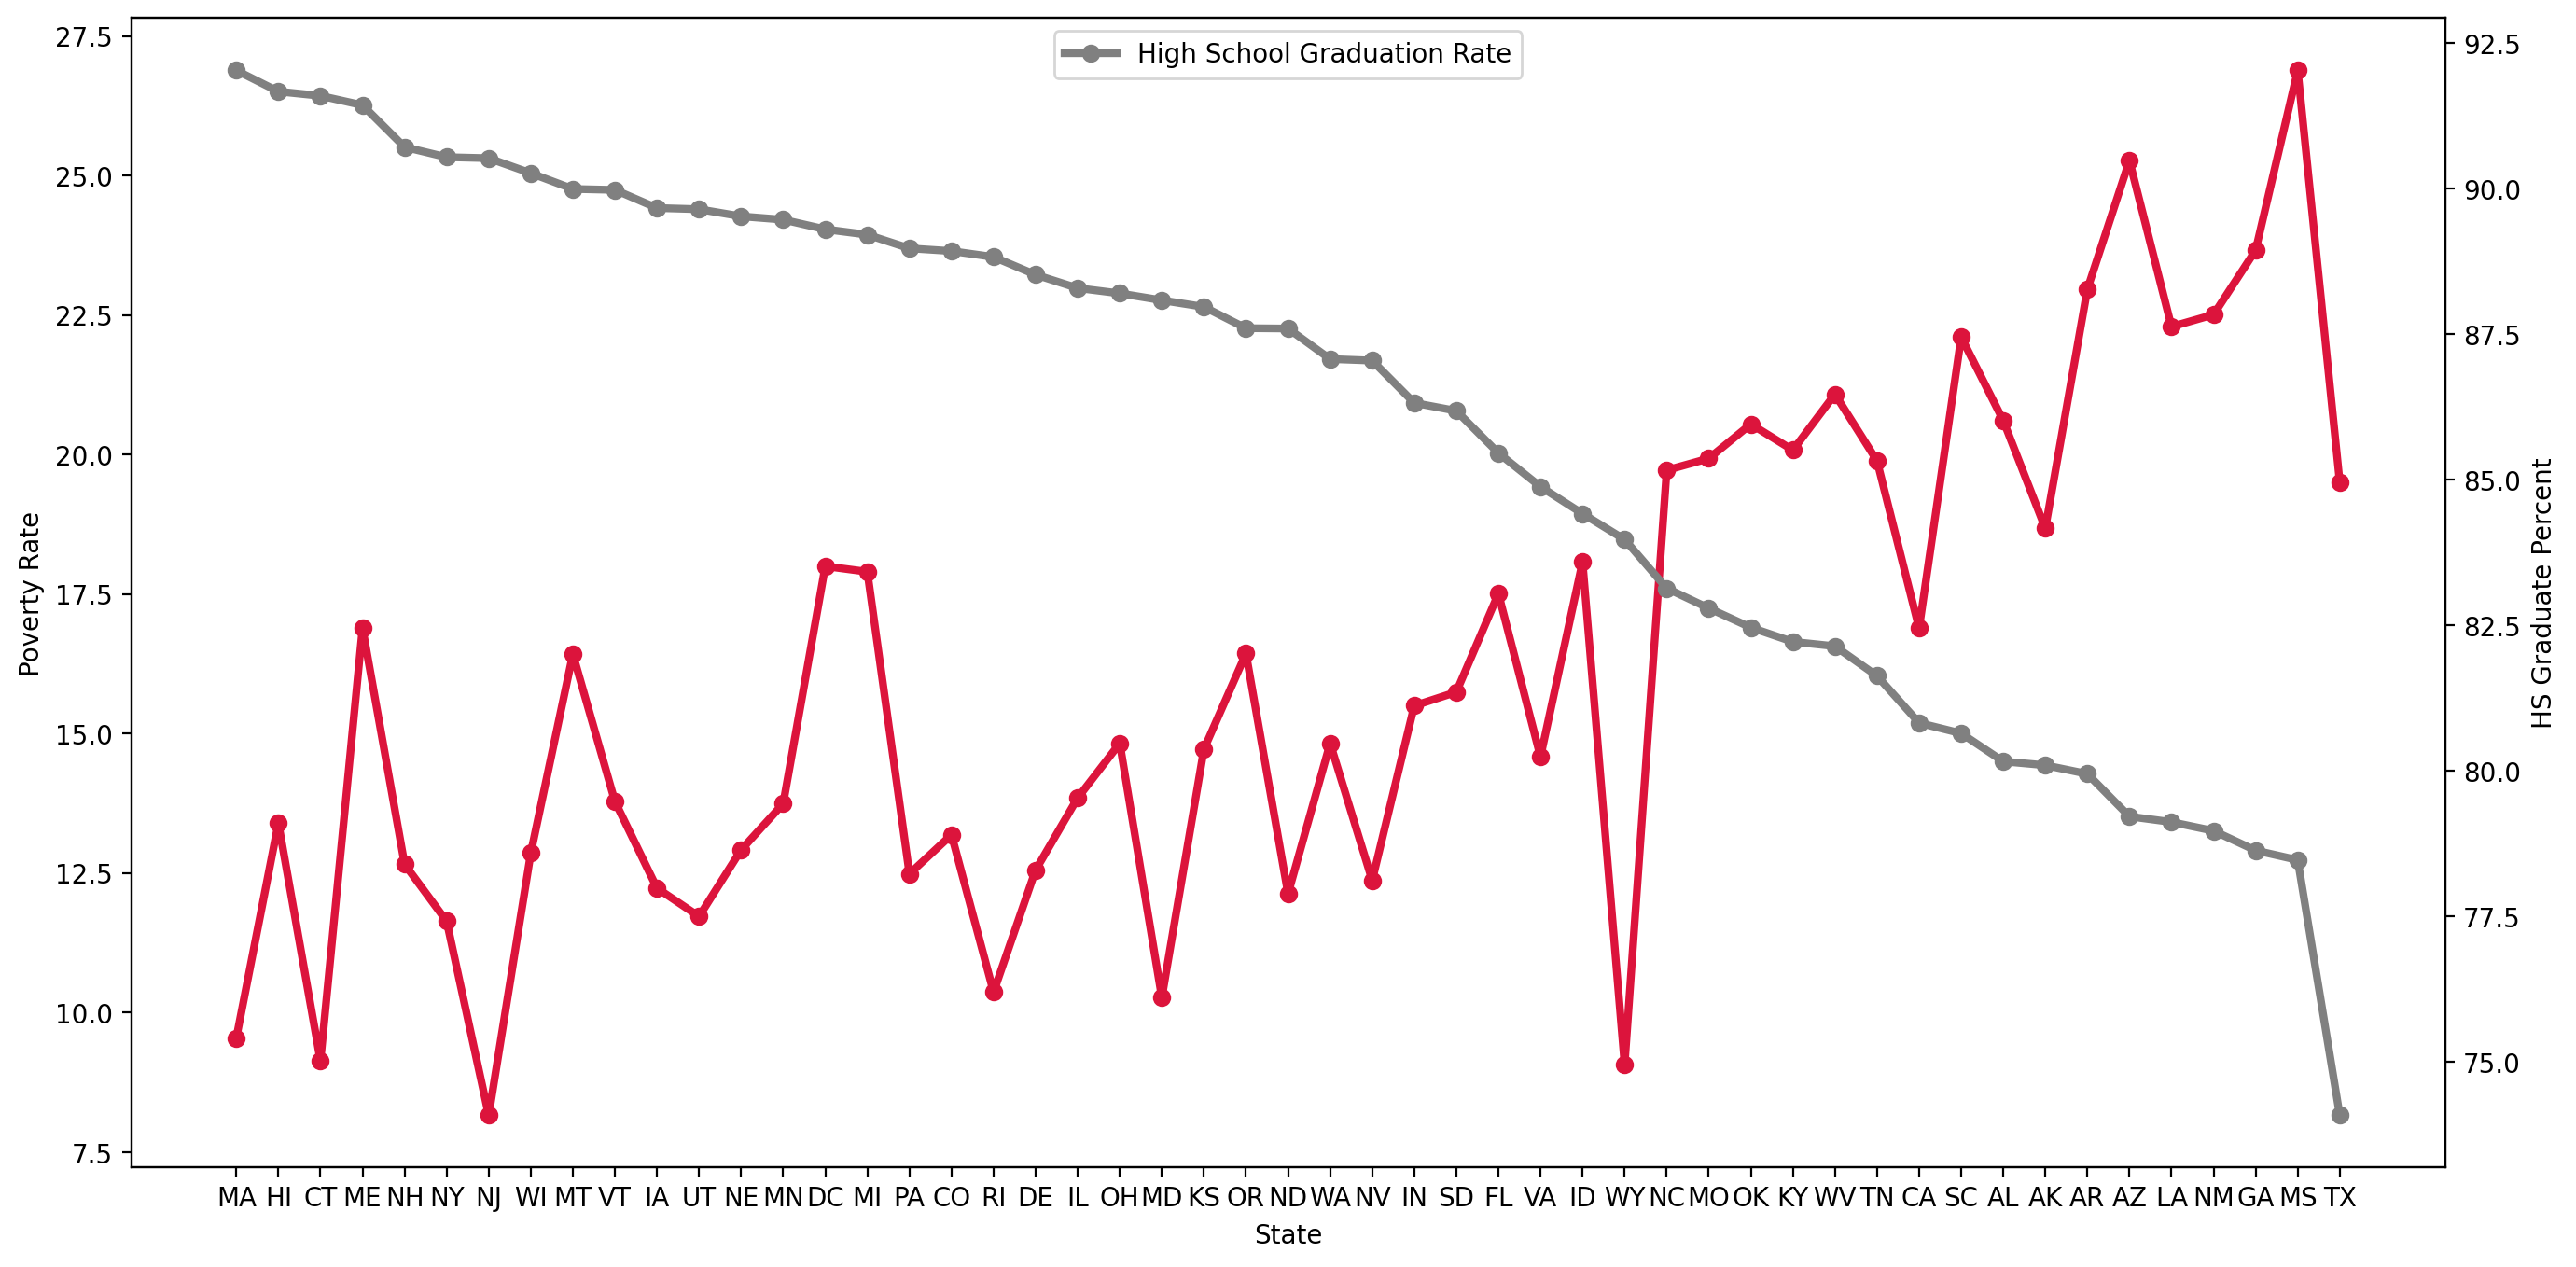

In [ ]:
plt.figure(figsize=(16,8), dpi=200)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate')
ax2.set_ylabel('HS Graduate Percent')

ax1.plot(
    hs_grads_poverty['Geographic Area'],
    hs_grads_poverty['poverty_rate'],
    c='crimson',
    linewidth=3,
    marker='o',
    label='Poverty Rate'
)

ax2.plot(
    hs_grads_poverty['Geographic Area'],
    hs_grads_poverty['percent_completed_hs'],
    c='grey',
    linewidth=3,
    marker='o',
    label='High School Graduation Rate'
)
plt.legend(loc='upper center')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

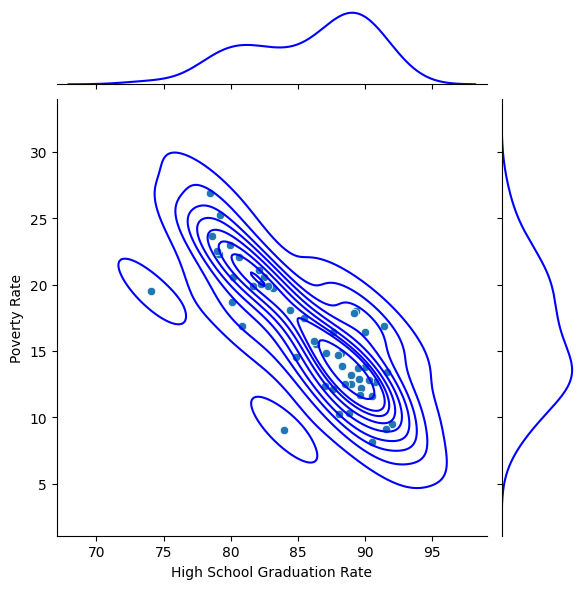

In [ ]:
ax = sns.jointplot(
    data=hs_grads_poverty,
    x='percent_completed_hs',
    y='poverty_rate',
    kind='kde',  # You can also try 'kde' for only KDE, or 'hex' for hexbin plot
    color='blue',  # Adjust color for visibility
    # marginal_kws=dict(bins=20, fill=True)  # Add histograms or KDEs on margins
)

ax.plot_joint(sns.scatterplot)
plt.xlabel('High School Graduation Rate')
plt.ylabel('Poverty Rate')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

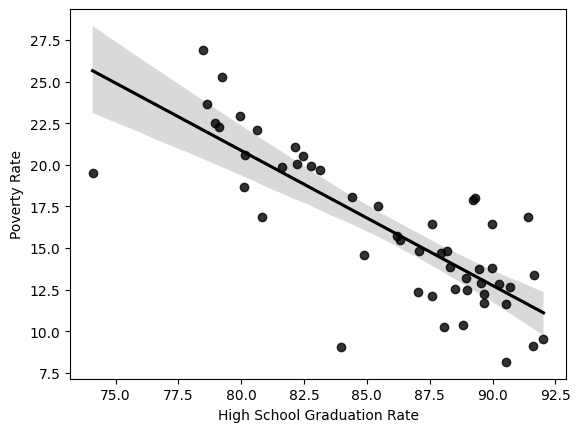

In [ ]:
sns.regplot(
    data=hs_grads_poverty,
    x="percent_completed_hs",
    y="poverty_rate",
    scatter=True,
    color='black'
)
plt.xlabel('High School Graduation Rate')
plt.ylabel('Poverty Rate')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city = df_share_race_city.replace('(X)', 0)
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric)
df_share_race_city.sort_values('share_white', ascending=False)  # check if there are any '(X)' in the dataframe

df_race_per_state = df_share_race_city.melt(id_vars='Geographic area',
                                            value_vars=['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american'],
                                            var_name='Race')

df_race_per_state = df_race_per_state.groupby(['Geographic area', 'Race'], as_index=False).agg({'value': pd.Series.sum})

In [ ]:
fig = px.bar(
    df_race_per_state,
    x="Geographic area",
    y="value",
    color="Race",
    title="State Population by Race"
)
fig.update_layout(xaxis_title="State",
                    yaxis_title='Population',
                    coloraxis_showscale=True)
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities['race'].value_counts()

,count
race,
W,1168
B,592
H,401
A,36
N,29
O,28


In [ ]:
race_fatalities = df_fatalities['race'].value_counts()

pie = px.pie(
    labels=race_fatalities,
    values=race_fatalities.values,
    title='Death by Race',
    hole=0.6,
    names=race_fatalities.index
)
pie.update_traces(textposition='outside', labels=['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other'], textinfo='percent+label')
pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
df_fatalities['gender'].value_counts()

,count
gender,
M,2160
F,94


In [ ]:
gender_fatalities = df_fatalities['gender'].value_counts()

pie = px.pie(
    labels=gender_fatalities,
    values=gender_fatalities.values,
    title='Death by Gender',
    hole=0.6,
    names=gender_fatalities.index
)
pie.update_traces(textposition='outside', textinfo='percent+label')
pie.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
# gender_age_death = df_fatalities.groupby(['gender', 'age', 'manner_of_death'], as_index=False).agg({'name': pd.Series.count})
gender_age_death = df_fatalities[['gender', 'age', 'manner_of_death']].value_counts()
gender_age_death = pd.DataFrame(gender_age_death)
gender_age_death
# df_fatalities

count
gender age   manner_of_death        
M      25.00 shot                 80
       36.00 shot                 76
       29.00 shot                 72
       24.00 shot                 70
       31.00 shot                 68
...                              ...
       76.00 shot and Tasered      1
       79.00 shot                  1
       80.00 shot                  1
       82.00 shot                  1
       91.00 shot                  1

[163 rows x 1 columns]

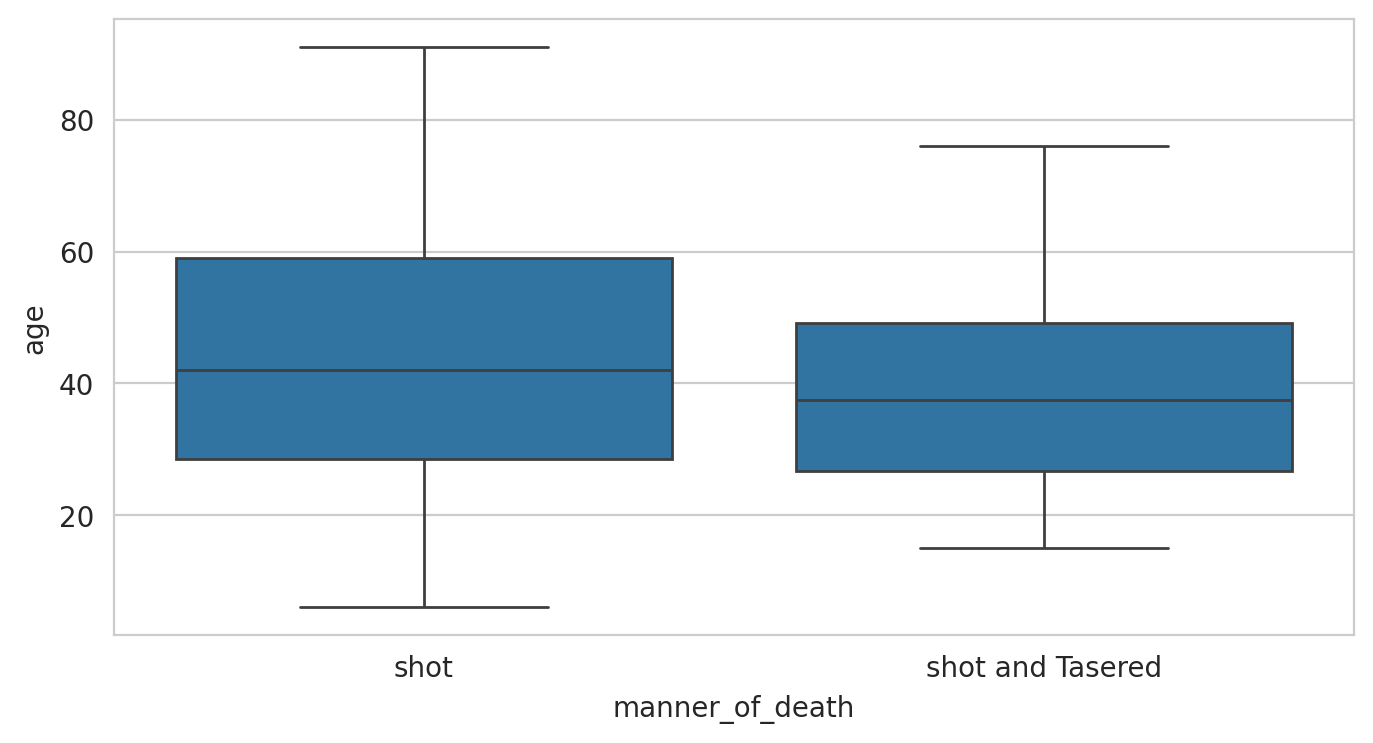

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.boxplot(
      gender_age_death,
      x='manner_of_death',
      y='age'
  )

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_armed = df_fatalities['armed'].value_counts().reset_index()
df_armed

,armed,count
0,gun,1247
1,knife,324
2,unarmed,165
3,vehicle,158
4,toy weapon,102
...,...,...
62,beer bottle,1
63,pipe,1
64,baseball bat and bottle,1
65,fireworks,1


In [ ]:
fig = px.bar(
    df_armed,
    x='armed',
    y='count'
)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities['race'].replace({'W': 'White', 'B': 'Black', 'N': 'Native American', 'A': 'Asian', 'H': 'Hispanic', 'O': 'Other'}, inplace=True)

<ipython-input-144-1b5e05ec476d>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
under_25 = df_fatalities[df_fatalities['age'] < 25]
pct_under_25 = (len(under_25)/len(df_fatalities)) * 100
print(f"The percentage of people killed were under 25 years old is about {round(pct_under_25)}%")

The percentage of people killed were under 25 years old is about 19%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

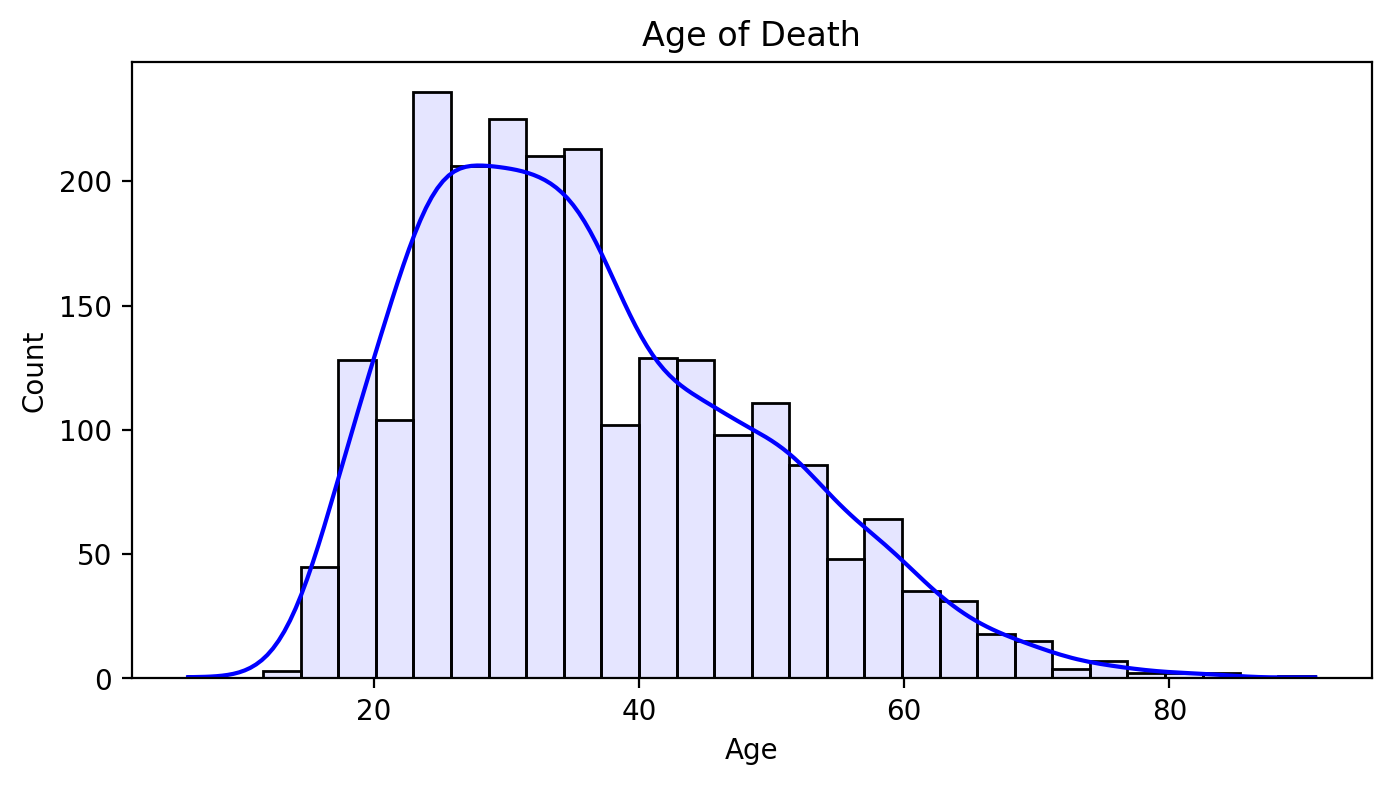

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

hist = sns.histplot(
    df_fatalities,
    x='age',
    bins=30,
    kde=True,
    color='blue',
    alpha=0.1
)

plt.xlabel('Age')
plt.title("Age of Death")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Figure size 1600x800 with 0 Axes>

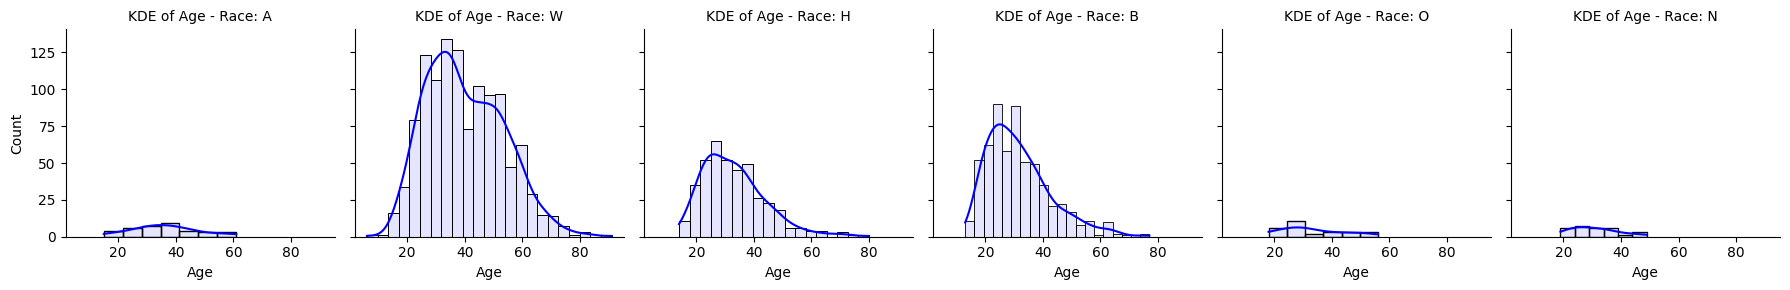

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

g = sns.FacetGrid(df_fatalities, col='race')
g.map_dataframe(sns.histplot, x='age', kde=True, color='blue', alpha=0.1, data=df_fatalities)
g.set_axis_labels("Age", "Count")
g.set_titles('KDE of Age - Race: {col_name}')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
race_fatalities = race_fatalities.reset_index()

fig = px.bar(race_fatalities, x='race', y='count')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mentally_ill_signs = df_fatalities['signs_of_mental_illness'].value_counts().reset_index() # a Dataframe of mentally illed victims
mentally_ill_true = df_fatalities[df_fatalities['signs_of_mental_illness'] == True]

pct_mentally_ill = (len(mentally_ill_true)/len(df_fatalities)) * 100
print(f"The percentage of people killed by police have been diagnosed with a mental illness is around {round(pct_mentally_ill)}%")

The percentage of people killed by police have been diagnosed with a mental illness is around 25%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
death_per_city_top10 = df_fatalities['city'].value_counts().head(10).sort_values(ascending=False).reset_index()

In [ ]:
fig = px.bar(death_per_city_top10, x='city', y='count')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
race_city_top10 = death_per_city_top10.merge(df_fatalities, on=['city'])
top10_race_deaths = race_city_top10.groupby(['city', 'count'])['race'].value_counts(dropna=False).reset_index(name='death_race')

In [ ]:
fig = px.bar(top10_race_deaths, x="city", y="death_race", color="race", title="Death in Top 10 Cities by Race")
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
death_per_state = df_fatalities['state'].value_counts().sort_values().reset_index()

In [ ]:
fig = px.choropleth(locations=death_per_state['state'], locationmode="USA-states", color=death_per_state['count'], scope="usa")
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y')

In [ ]:
# Deaths per month from January 2015 to July 2017
temp = df_fatalities
temp['month_year'] = temp['date'].dt.strftime('%Y-%m')
time_monthly = temp.groupby('month_year').size().reset_index(name='death_count')

In [ ]:
fig = px.bar(time_monthly, x='month_year', y='death_count')

fig.update_layout(xaxis_title="Date",
                    yaxis_title='Number of Deaths',
                    coloraxis_showscale=True)

fig.show()



In [ ]:
df_fatalities['year'] = df_fatalities['date'].dt.year

In [ ]:
death_overtime = df_fatalities['year'].value_counts().sort_values(ascending=False).reset_index()

In [ ]:
fig = px.bar(death_overtime, x='year', y='count')
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).